# TODO:
 - task 2
 - task 3
 - more ambitious hashing
 - clean-up

In [1]:
import hashlib
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

m = hashlib.sha256()
m.update(b"Nobody inspects")
m.update(b" the spammish repetition")
m.digest()

m.hexdigest()

'031edd7d41651593c5fe5c006fa5752b37fddff7bc4e843aa6af0c950f4b9406'

In [2]:
hashlib.sha256(b"Nobody inspects the spammish repetition").hexdigest()

'031edd7d41651593c5fe5c006fa5752b37fddff7bc4e843aa6af0c950f4b9406'

In [3]:
hashlib.sha256(b"Nobody inspects the spammish repetition").digest()

b'\x03\x1e\xdd}Ae\x15\x93\xc5\xfe\\\x00o\xa5u+7\xfd\xdf\xf7\xbcN\x84:\xa6\xaf\x0c\x95\x0fK\x94\x06'

In [4]:
import hashlib

res = hashlib.md5(b'GeeksforGeeks')
print(res.digest())

b'\xf1\xe0ix~\xcetS\x1d\x11%Y\x94\\hq'


In [5]:
import sys
a = b"HEllo"
b = b"World"

# Print bitwise OR operation
print("a | b =", int.from_bytes(a, sys.byteorder) | int.from_bytes(b, sys.byteorder))

a | b = 478561595231


In [6]:
len(os.urandom(32))

32

In [7]:
len(os.urandom(16))

16

In [8]:
def run_md5(data: bytes) -> bytes:
    return hashlib.md5(data).digest()

In [9]:
def run_sha(data: bytes) -> bytes:
    return hashlib.sha256(data).digest()

In [10]:
def run_dummy_hash(data: bytes) -> bytes:

    h = 0x12345678
    for b in data:
        h ^= b
        h = ((h << 5) | (h >> 27)) & 0xFFFFFFFF
        h = (h + 0x9E3779B9) & 0xFFFFFFFF

    return h.to_bytes(4, byteorder=sys.byteorder)


for text in [b"hello", b"Hello", b"hello!", b"world", b"hashing"]:
    print(run_dummy_hash(text))


b'\xe5\x82\t\xbe'
b'\xe5\x82\t\xfe'
b'P\xd2g_'
b'\x05\x82"\xbf'
b'\xa3\xe4ua'


In [11]:
i = 10
bitmask = 1 << i
print(bin(bitmask))

0b10000000000


In [12]:
def plot_SAC_results(all_results, figsize=(18, 10), title="SAC Analysis Results",
                     x_label="Changed Bit Index", y_label="Original Bit Index",
                     annot_values=False, normalize=True):
    """
    Plots SAC results for multiple hash algorithms with optional normalization
    and numeric annotations.

    Parameters
    ----------
    all_results : dict
        {algorithm_name: (results_matrix, bit_means_changed, bit_std_changed, bit_means_og, bit_std_og)}
    figsize : tuple
        Figure size (width, height)
    title : str
        Title of the entire plot
    x_label, y_label : str
        Axis labels for the main matrix heatmaps
    annot_values : bool
        Whether to display numeric values rounded to 2 decimals
    normalize : bool
        If True, normalize color scales across algorithms for fair comparison
    """
    n_algorithms = len(all_results)
    n_rows = 5  # Matrix + 4 one-row heatmaps
    
    fig, axes = plt.subplots(
        n_rows, n_algorithms, figsize=figsize,
        gridspec_kw={'height_ratios': [6, 0.5, 0.5, 0.5, 0.5]}
    )
    if n_algorithms == 1:
        axes = np.expand_dims(axes, axis=1)

    # Define color palettes
    cmap_matrix = "mako"
    cmap_mean_og = "crest"
    cmap_std_og = "flare"
    cmap_mean_ch = "rocket"
    cmap_std_ch = "magma"

    # --- Determine normalization (shared color scales) ---
    if normalize:
        matrices, mean_og, std_og, mean_ch, std_ch = [], [], [], [], []
        for values in all_results.values():
            m, mch, sch, mog, sog = values
            matrices.append(m)
            mean_ch.append(mch)
            std_ch.append(sch)
            mean_og.append(mog)
            std_og.append(sog)

        def global_min_max(arrs):
            all_vals = np.concatenate([a.flatten() for a in arrs])
            return np.min(all_vals), np.max(all_vals)

        vmin_matrix, vmax_matrix = global_min_max(matrices)
        vmin_mean_og, vmax_mean_og = global_min_max(mean_og)
        vmin_std_og, vmax_std_og = global_min_max(std_og)
        vmin_mean_ch, vmax_mean_ch = global_min_max(mean_ch)
        vmin_std_ch, vmax_std_ch = global_min_max(std_ch)
    else:
        vmin_matrix = vmax_matrix = None
        vmin_mean_og = vmax_mean_og = None
        vmin_std_og = vmax_std_og = None
        vmin_mean_ch = vmax_mean_ch = None
        vmin_std_ch = vmax_std_ch = None

    # --- Plot each algorithm column ---
    for col_idx, (alg_name, values) in enumerate(all_results.items()):
        results_matrix, bit_means_changed, bit_std_changed, bit_means_og, bit_std_og = values
        
        # Conditional probability matrix
        sns.heatmap(
            results_matrix, ax=axes[0, col_idx], cmap=cmap_matrix, cbar=True,
            vmin=vmin_matrix, vmax=vmax_matrix, annot=annot_values,
            fmt=".2f" if annot_values else "", annot_kws={"size": 6}
        )
        axes[0, col_idx].set_title(alg_name, fontsize=14, weight='bold', pad=10)
        axes[0, col_idx].set_xlabel(x_label, fontsize=10)
        axes[0, col_idx].set_ylabel(y_label if col_idx == 0 else "", fontsize=10)

        # Mean (original)
        sns.heatmap(
            bit_means_og[np.newaxis, :], ax=axes[1, col_idx], cmap=cmap_mean_og,
            cbar=False, xticklabels=False, yticklabels=["Mean (OG)"],
            vmin=vmin_mean_og, vmax=vmax_mean_og,
            annot=annot_values, fmt=".2f" if annot_values else "", annot_kws={"size": 6}
        )

        # Std (original)
        sns.heatmap(
            bit_std_og[np.newaxis, :], ax=axes[2, col_idx], cmap=cmap_std_og,
            cbar=False, xticklabels=False, yticklabels=["Std (OG)"],
            vmin=vmin_std_og, vmax=vmax_std_og,
            annot=annot_values, fmt=".2f" if annot_values else "", annot_kws={"size": 6}
        )

        # Mean (changed)
        sns.heatmap(
            bit_means_changed[np.newaxis, :], ax=axes[3, col_idx], cmap=cmap_mean_ch,
            cbar=False, xticklabels=False, yticklabels=["Mean (Changed)"],
            vmin=vmin_mean_ch, vmax=vmax_mean_ch,
            annot=annot_values, fmt=".2f" if annot_values else "", annot_kws={"size": 6}
        )

        # Std (changed)
        sns.heatmap(
            bit_std_changed[np.newaxis, :], ax=axes[4, col_idx], cmap=cmap_std_ch,
            cbar=False, xticklabels=False, yticklabels=["Std (Changed)"],
            vmin=vmin_std_ch, vmax=vmax_std_ch,
            annot=annot_values, fmt=".2f" if annot_values else "", annot_kws={"size": 6}
        )

        # Clean small plots
        for row in range(1, n_rows):
            axes[row, col_idx].tick_params(left=False, bottom=False)
            if col_idx != 0:
                axes[row, col_idx].set_ylabel("")

    # Global layout
    fig.suptitle(title, fontsize=18, weight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [13]:
def produce_data(n_examples, message_size):
    data = []
    for i in range(n_examples):
        message = os.urandom(message_size)
        data.append(message)
    return data

def get_elementary_bit_vector(i, n):
    """Return a bytes object representing an n-bit vector with bit i=1 (LSB = bit 0)."""
    n_bytes = math.ceil(n / 8)
    vector = bytearray(n_bytes)
    byte_index = i // 8
    bit_index = i % 8  # LSB-first order
    vector[n_bytes - byte_index - 1] = 1 << bit_index  # fill from right
    return bytes(vector)

def xor_bytes(a, b):
    """Bitwise XOR of two byte strings of equal length."""
    return bytes(x ^ y for x, y in zip(a, b))

def bytes_to_bitstring(b):
    """Convert bytes to bitstring representation."""
    return ''.join(f'{byte:08b}' for byte in b)

def analyze_results_SAC(results):
    arr_changed = []
    arr_original = []
    for x, y in results:
        temp_original = []
        temp_changed = []
        for i in range(len(x)):
            temp_original.append(int(x[i]))
            temp_changed.append(int(y[i]))
        arr_original.append(temp_original)
        arr_changed.append(temp_changed)

    arr_changed = np.array(arr_changed, dtype=int)
    arr_original = np.array(arr_original, dtype=int)
    message_size = arr_original.shape[-1]

    total_sum = np.sum(arr_original, axis=0)
    results_matrix = np.zeros(shape = (message_size, message_size))
    bit_means_changed = np.mean(arr_changed, axis=0)
    bit_std_changed = np.std(arr_changed, axis=0)
    bit_means_og = np.mean(arr_original, axis=0)
    bit_std_og = np.std(arr_original, axis=0)

    for og_idx in range(message_size):
        for changed_idx in range(message_size):
            result = np.sum((arr_changed[:, changed_idx] == 1) & (arr_original[:, og_idx] == 1))/total_sum[og_idx]
            results_matrix[og_idx][changed_idx] = result
    return results_matrix, bit_means_changed, bit_std_changed, bit_means_og, bit_std_og

def test_SAC(data, message_size, testing_size, hash_func):
    results = []
    for datum in data:
        hashed = hash_func(datum)
        for i in range(testing_size):
            ei = get_elementary_bit_vector(i, message_size * 8)
            changed = xor_bytes(datum, ei)
            hashed_changed = hash_func(changed)

            hashed_bits = bytes_to_bitstring(hashed)[-testing_size:]
            hashed_changed_bits = bytes_to_bitstring(hashed_changed)[-testing_size:]
            results.append((hashed_bits, hashed_changed_bits))
    
    return results

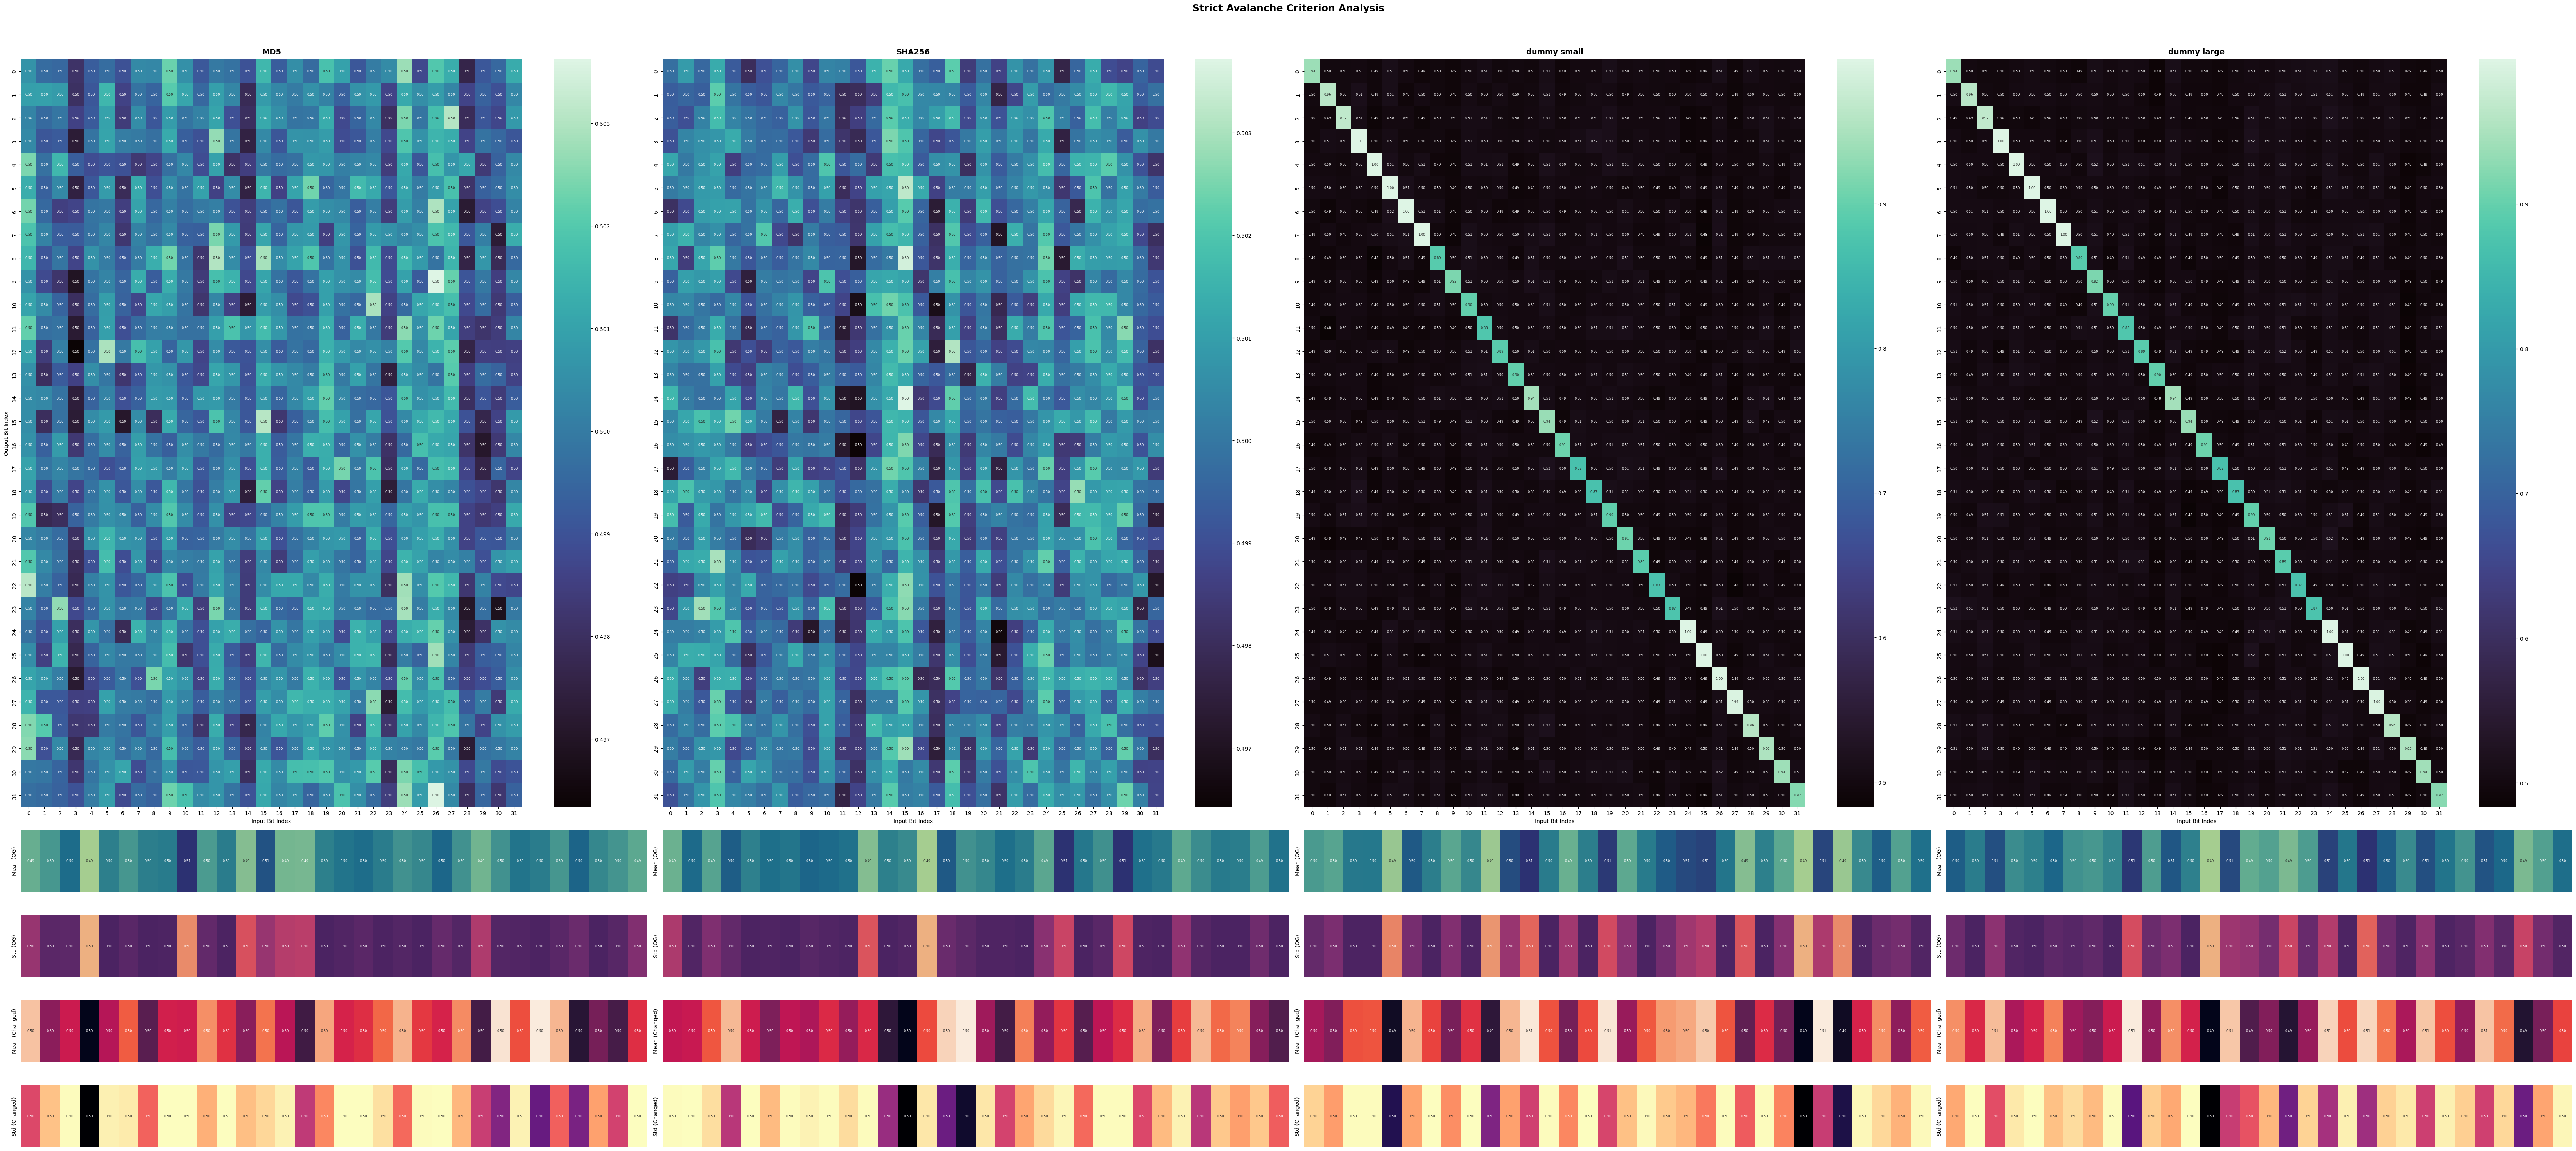

In [14]:
all_results = {}
n_examples = 10000
testing_size = 32 # in bits

algorithms = {
    "MD5" : (run_md5, 16),
    "SHA256" : (run_sha, 32),
    "dummy small" : (run_dummy_hash, 16),
    "dummy large" : (run_dummy_hash, 32)
}

for alg_name, input_data in algorithms.items():
    hash_func, message_size = input_data
    data = produce_data(n_examples=n_examples,
                        message_size=message_size)
    results = test_SAC(data=data,
                       message_size=message_size,
                       testing_size=testing_size,
                       hash_func=hash_func)
    
    results_matrix, bit_means_changed, bit_std_changed, bit_means_og, bit_std_og = analyze_results_SAC(results=results)
    all_results[alg_name] = (results_matrix.copy(),
                             bit_means_changed.copy(),
                             bit_std_changed.copy(),
                             bit_means_og.copy(),
                             bit_std_og.copy())
    
plot_SAC_results(all_results,
                 figsize=(66, 30),
                 title="Strict Avalanche Criterion Analysis",
                 x_label="Input Bit Index",
                 y_label="Output Bit Index",
                 annot_values=True,
                 normalize=False)


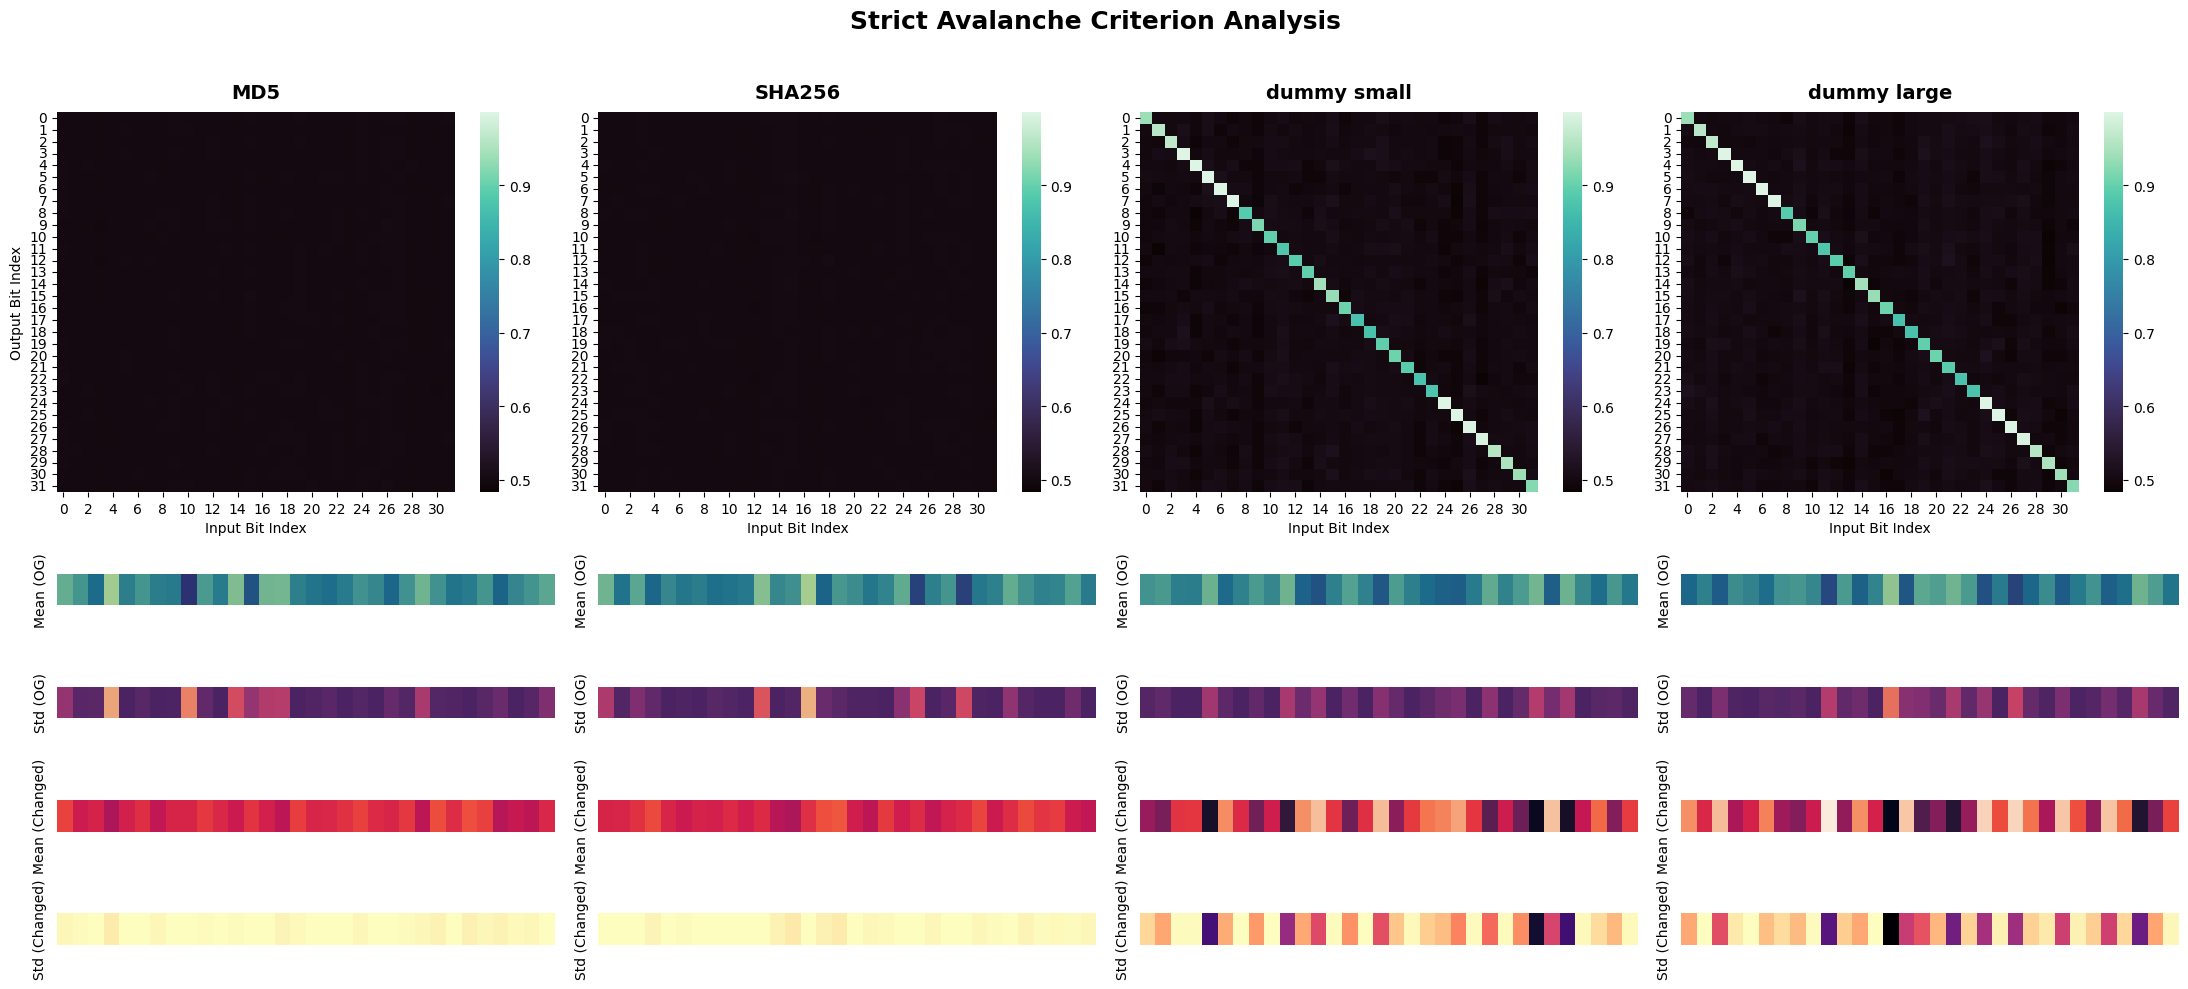

In [15]:
plot_SAC_results(all_results,
                 figsize=(22, 10),
                 title="Strict Avalanche Criterion Analysis",
                 x_label="Input Bit Index",
                 y_label="Output Bit Index",
                 annot_values=False,
                 normalize=True)